<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

https://colab.research.google.com/drive/1wdq85X-eS2-sCkpC7WfLZ2J0M0JPvBsI?usp=sharing

In [1]:
import numpy as np              # для работы с массивами чисел
import pandas as pd             # для работы с таблицами

import matplotlib.pyplot as plt # для работы с графиками
import seaborn as sns           # для работы с красивыми графиками из pd.DataFrame



In [2]:
# стиль графиков
sns.set(style='darkgrid', palette='pastel', color_codes=True)

# задать размер графиков
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
X = df.drop('price',axis=1)
X = pd.get_dummies(X)
y = df['price']/1000

X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import SCORERS, mean_absolute_error
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, shuffle=True)


In [7]:
def get_train_test_score(model, score, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    score_info = {
        score.__name__:{
        'train': score(y_train, model.predict(X_train)),
        'test': score(y_test, model.predict(X_test))
    }
    }
    return pd.DataFrame(score_info)

In [8]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()

get_train_test_score(reg, mean_absolute_error, X_train, X_test, y_train, y_test)

,mean_absolute_error
test,1.328645
train,1.354588


In [9]:
from sklearn.ensemble import GradientBoostingRegressor


gbm = GradientBoostingRegressor()
get_train_test_score(gbm, mean_absolute_error, X_train, X_test, y_train, y_test)

,mean_absolute_error
test,0.417545
train,0.381475


In [10]:
# without shuffling
cross_val_score(gbm, X, y , cv=3, scoring='neg_mean_absolute_error')

array([-1.60378474, -2.48840817, -0.5969076 ])

In [11]:
# with shuffling
cv_kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val_score(gbm, X, y , cv=cv_kfold, scoring='neg_mean_absolute_error')

array([-0.40251744, -0.41117164, -0.40984593])

- tune on the model on the all samples and features
- choose max_depth + min_samples_leaf
    - lr = 0.1 (high)
    - n_estimators = 100 (small)
- choose on the fraction of samples and features on each iteration
- choose lr + n_estimators

In [24]:
[2**i for i in range(5)]

[1, 2, 4, 8, 16]

In [25]:
 np.linspace(1, 20, 10, dtype=int)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20])

In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

max_depth_ = [2**i for i in range(5)]
min_samples_leaf_ = np.linspace(1, 20, 10, dtype=int)

params = {
    'max_depth': max_depth_,
    'min_samples_leaf': min_samples_leaf_,
}

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

gbm_cv = GridSearchCV(estimator=gbm, cv=cv_kfold, 
                      param_grid=params,
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
gbm_cv.fit(X_train, y_train)
gbm_cv.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.0s finished


{'max_depth': 16, 'min_samples_leaf': 17}

In [13]:
gbm_cv_random = RandomizedSearchCV(estimator=gbm, cv=cv_kfold, 
                      param_distributions=params,
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2,
                      n_iter = 15)
gbm_cv_random.fit(X_train, y_train)
gbm_cv_random.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.7s finished


{'min_samples_leaf': 17, 'max_depth': 8}

In [14]:
params = {
    'n_estimators': np.logspace(1,3,10, dtype=int),
    'learning_rate': np.logspace(-4,-1,10),
}

gbm = GradientBoostingRegressor()
gbm.set_params(**gbm_cv_random.best_params_)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=17)

In [15]:
gbm.get_params()['max_depth'], gbm.get_params()['min_samples_leaf']

(8, 17)

In [16]:
gbm_cv_random2 = RandomizedSearchCV(estimator=gbm, cv=cv_kfold, # more folds are needed
                      param_distributions=params,
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2,
                      n_iter = 15 # more iterations needed
                      )
gbm_cv_random2.fit(X_train, y_train)
gbm_cv_random2.best_estimator_.get_params()

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.3s finished


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 17,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
gbm_cv_random2.best_params_

{'n_estimators': 1000, 'learning_rate': 0.01}

In [18]:
cv_kfold_10 = KFold(n_splits=10, shuffle=True, random_state=42)
gbm_cv_random3 = RandomizedSearchCV(estimator=gbm, cv=cv_kfold_10, # more folds are needed
                      param_distributions=params,
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2,
                      n_iter = 150 # more iterations needed
                      )
gbm_cv_random3.fit(X_train, y_train)
gbm_cv_random3.best_estimator_.get_params()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 100 is smaller than n_iter=150. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.8min finished


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 17,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [19]:
gbm_cv_random3.best_estimator_.estimators_[3][0]#.get_n_leaves()

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      min_samples_leaf=17,
                      random_state=RandomState(MT19937) at 0x13CE3BDB0)

In [20]:
gbm_final = GradientBoostingRegressor()
gbm_final.set_params(**gbm_cv_random2.best_estimator_.get_params())


get_train_test_score(gbm_final, mean_absolute_error, X_train, X_test, y_train, y_test)

,mean_absolute_error
test,0.330648
train,0.230524


In [21]:
gbm_final = GradientBoostingRegressor()
gbm_final.set_params(**gbm_cv_random3.best_estimator_.get_params())


get_train_test_score(gbm_final, mean_absolute_error, X_train, X_test, y_train, y_test)

,mean_absolute_error
test,0.330648
train,0.230524


In [22]:
gbm_default = GradientBoostingRegressor()
get_train_test_score(gbm_default, mean_absolute_error, X_train, X_test, y_train, y_test)

,mean_absolute_error
test,0.417761
train,0.381475


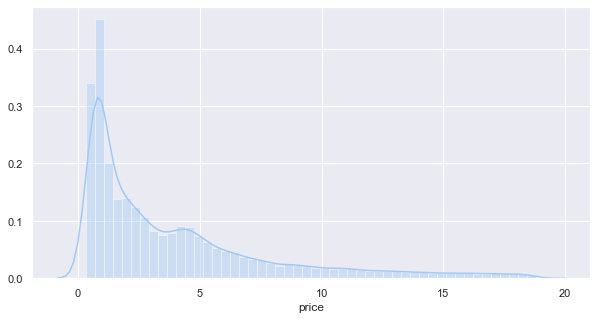

In [23]:
sns.distplot(y)